# Read in Data from a CSV file with csv

Comma Separated Value (CSV) files are a common format for moving tables of data between different applications. Spreadsheet programs will save a table of data as CSV, and we can easily get our Arduino output to look like CSV, with the same number of elements in each line to make life easier.

In this example each line contains the same number of tokens separated by commas. The first line in the file contains some descriptive text and the rest are rows of numbers. The first number in every row is a time in microseconds as an unsigned 32 bit number. We don't need to know this to pull the data in from the CSV file, and we can figure it out by looking at the data after we read it. You can check the original CSV file by looking at it in a text editor.

This code is pretty well cut and paste from the csv.reader() documentation you can find by googling "python csv". https://docs.python.org/3/library/csv.html

In [2]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

In [3]:
with open('TMP00020.CSV') as csvfile:
    dataRead = csv.reader(csvfile)
    a = asarray([data for data in dataRead])

## Print the first few lines as a check then plot
a[ ] is now a two dimensional array compatible with numpy routines, but **everything in the array is still a string**, as we can see by printing the shape and the content. Note that there is a blank token at the end of every line because the file had an extra trailing comma at the end of each line. We'll have to be careful not to try to convert those blanks into numbers, as that will generate an error.


In [6]:
print(shape(a))
print(a[0:5])

(5052, 8)
[['microseconds' ' seconds' ' light' ' USB' ' T1' ' T2' ' BAT' ' ']
 ['4933697' ' 4.93' ' 48.69' ' 3.9836' ' 22.76' ' 24.00' ' 4.1524' ' ']
 ['5105694' ' 5.11' ' 48.74' ' 3.9821' ' 22.84' ' 24.10' ' 4.1476' ' ']
 ['5151696' ' 5.15' ' 48.69' ' 3.9757' ' 23.00' ' 24.10' ' 4.1492' ' ']
 ['5193699' ' 5.19' ' 48.74' ' 3.9805' ' 23.32' ' 24.10' ' 4.1461' ' ']]


## Slice off the non-numeric data

Now that we can see what the array looks like, we can tell which elements we will be able to convert into floating point numbers. For example we can recognize the second column is time in seconds and the fifth column is the T1 column, data from the TMP 36. 

The first row is charadter strings, so we better slice it off. Likewise the last column.

b[ ] is just the numbers we want from a[ ], but still as strings. It leaves off the first row, the first column, and the last, blank, element in each row by slicing carefully. a[1: , 1:len(a[1])-1] slices the array to choose only rows from 1 to the end (1:) and columns only from 1 to 1 less than the length of the row (1:len(a[1])-1). Remember that the indices start at 0 and the slice won't include the last index, so 1:3 will include only elements 1 and 2.

This code will fail if there aren't the same number of elements in each line of the file, because the shape of the array will be irregular.

In [8]:
b = a[1:,1:len(a[1])-1]
print(b[0:4])

[[' 4.93' ' 48.69' ' 3.9836' ' 22.76' ' 24.00' ' 4.1524']
 [' 5.11' ' 48.74' ' 3.9821' ' 22.84' ' 24.10' ' 4.1476']
 [' 5.15' ' 48.69' ' 3.9757' ' 23.00' ' 24.10' ' 4.1492']
 [' 5.19' ' 48.74' ' 3.9805' ' 23.32' ' 24.10' ' 4.1461']]


## Convert to floating point values with asfarray()
We still can't plot the data properly until we convert the strings to floats with asfarray().

micros[ ] is a 1D array of the time in microseconds as a 32 bit unsigned integer. 

labs[ ] are the labels from the first line in the file, skipping the microseconds label.


In [9]:
d = asfarray(b)
print(d[0:4])
labs = a[0,1:]
micros = asfarray(a[1:,0])

[[ 4.93   48.69    3.9836 22.76   24.      4.1524]
 [ 5.11   48.74    3.9821 22.84   24.1     4.1476]
 [ 5.15   48.69    3.9757 23.     24.1     4.1492]
 [ 5.19   48.74    3.9805 23.32   24.1     4.1461]]


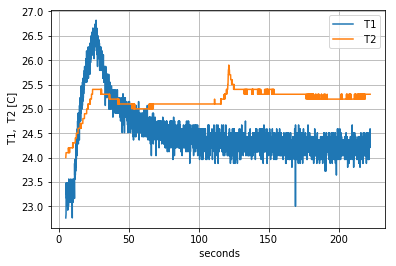

In [10]:
plot(d[:,0],d[:,3],label = labs[3]) # column 0 is the time in seconds
plot(d[:,0],d[:,4],label = labs[4]) 
xlabel(labs[0])
ylabel(labs[3]+', '+labs[4]+' [C]')
legend()
grid()

## Writing a CSV is even easier
Most of the effort goes into creating a matrix in the tabular shape we want, and there are lots of Python routines for stacking and rotating and flipping, etc. Googling "python flip a matrix" will get you on the right track, just like "python mirror an array".

[[  0.           2.22222222   4.44444444   6.66666667   8.88888889]
 [146.98355715 181.62315308 211.45736273 243.37958836 266.36107399]]
[[ 20.         351.85615393]
 [ 17.77777778 339.30291083]
 [ 15.55555556 325.40145022]
 [ 13.33333333 303.86293856]
 [ 11.11111111 292.03054233]]
[[  0.         146.98355715]
 [  2.22222222 181.62315308]
 [  4.44444444 211.45736273]
 [  6.66666667 243.37958836]
 [  8.88888889 266.36107399]]


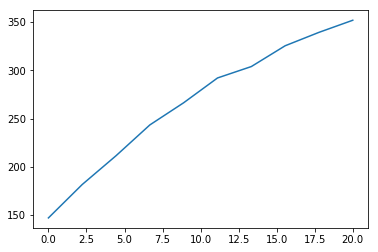

In [11]:
t = linspace(0,20,10)
T = 444 - exp(-t/17.3)*298 + random.randn(len(t))*2.5
a = vstack((t,T))    # stack them one atop the other to make two rows
print(a[:,:5])
a = rot90(a)         # rotate the matrix 90 degrees to make two columns
print(a[:5])
a = flipud(a)        # flip the matrix upside down to put it in the order we want
print(a[:5])
savetxt("Tmeas.csv", a, delimiter=",")   # write the file
plot(a[:, 0],a[:,1])

## Check by reading
or by opening the file in an editor or a spreadsheet.

In [12]:
with open('Tmeas.csv') as csvfile:
    dataRead = csv.reader(csvfile)
    a = asarray([data for data in dataRead])
print(a[0:5])

[['0.000000000000000000e+00' '1.469835571515070853e+02']
 ['2.222222222222222321e+00' '1.816231530783558128e+02']
 ['4.444444444444444642e+00' '2.114573627305169339e+02']
 ['6.666666666666666963e+00' '2.433795883635030179e+02']
 ['8.888888888888889284e+00' '2.663610739882276448e+02']]
